# 911 Calls  Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Importing numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Importing visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

** Reading in the csv file as a dataframe called df **

In [3]:
df= pd.read_csv('911.csv')

** Checking the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Finding the top 5 zipcodes for 911 calls **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Finding the top 5 townships (twp) for 911 calls **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Calculating the total unique title  **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.  creating a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
def fun(m):
    return m.split(":")[0]
df['Reason'] = df.apply(lambda x : fun(x['title']), axis=1)


In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** Finding the most common Reason for a 911 call based off of this new column **

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Creating a countplot of 911 calls by Reason. **

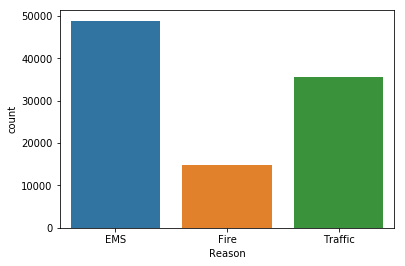

In [12]:
import seaborn as sns
sns.countplot(x='Reason',data=df)

___
** Finding the data type of the objects in the timeStamp column **

In [13]:
type(df['timeStamp'].iloc[0])

str

** Converting the column from strings to DateTime objects. **

In [14]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [16]:
df['timeStamp'].head(5)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

** Creating 3 new columns called Hour, Month, and Day.**

In [41]:
def hour(h):
    return h.hour
df['hour'] = df.apply(lambda x : hour(x['timeStamp']),axis=1)


In [58]:
def month(m):
    return m.month
df['month'] = df.apply(lambda x : month(x['timeStamp']),axis=1)

In [43]:
def day(d):
    return d.dayofweek
df['day'] = df.apply(lambda x : day(x['timeStamp']),axis=1)

In [44]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Mapping the actual string names to the days **

    

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
df['day'] = df['day'].map(dmap)

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Creating a countplot of the Day column with the hue based off of the Reason column. **

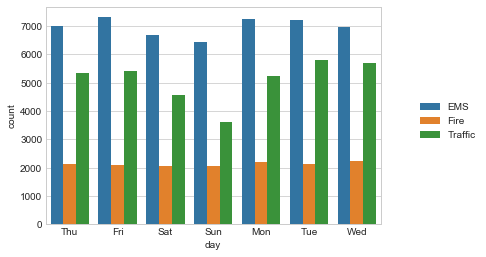

In [94]:
sns.countplot(x=df['day'],hue = df['Reason'])
plt.legend(loc=9,bbox_to_anchor=(1.2,0.6))

** Easy to see that EMS has the highest volume of callsgardless of week closely followed by traffic calls. Fire calls are very
   consistent throughout the week **

**Repeating the same for Month:**

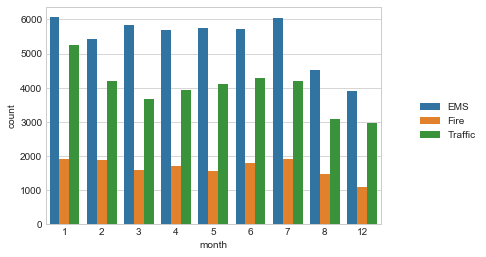

In [95]:
sns.countplot(x=df['month'],hue=df['Reason'])
plt.legend(loc=9,bbox_to_anchor=(1.2,0.6))

** Again, we roughly get the same outcome. Although we are missing some months **

In [59]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Creating a gropuby object and grouping the DataFrame by the month column and using the count() method for aggregation**

In [60]:
bylook= df.groupby('month').count()

In [61]:
bylook.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Creating a simple plot off of the dataframe indicating the count of calls per month. **

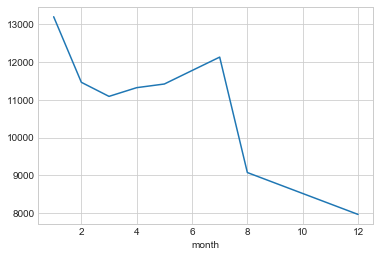

In [97]:
bylook['twp'].plot()

** This graph tells us that the most calls were made in January with a spike in the downward trend around July. Notice that the y-axis starts at 8000 so there are still a large amount of calls even though the graph suggests a large drop. We need to set the index to a columns to create a linear fit on the number of calls per month. Again, any column will work for "y" to get the number of calls **

** Create a linear fit on the number of calls per month.**

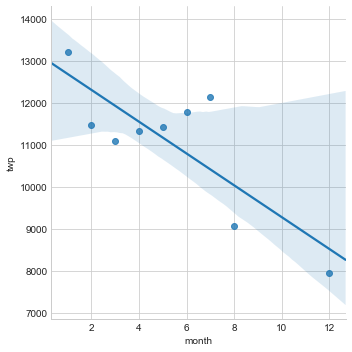

In [100]:
sns.lmplot(x='month',y='twp',data = bylook.reset_index())

** This graph shows that assumption from the line plot was correct. The trend is down with outliers in the month of july where   thee was a peak in number of calls **

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [67]:
def day(d):
    return d.date()
df['date'] = df.apply(lambda x : day(x['timeStamp']),axis=1)

In [68]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**  Grouping this Date column with the count() aggregate and creating a plot of counts of 911 calls.**

In [71]:
bydate= df.groupby('date').count()

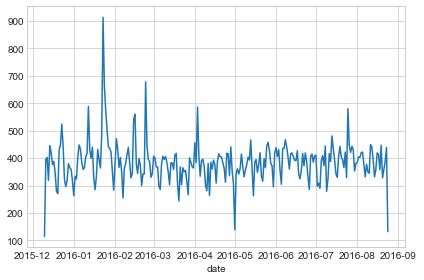

In [102]:
bydate['twp'].plot()
plt.tight_layout()

** Recreating this plot by creating 3 separate plots with each plot representing a Reason for the 911 call**

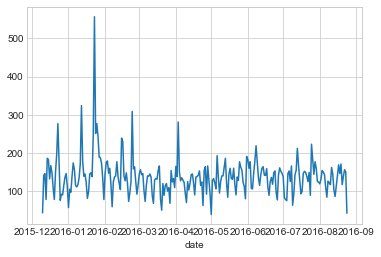

In [103]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()

** We can see that there are more 911 calls because of traffic reasons in winter months as the traffic condition  is difficult during winters **

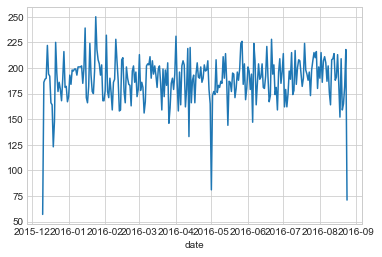

In [104]:
df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()

** EMS calls appear to be consistent through out the year **

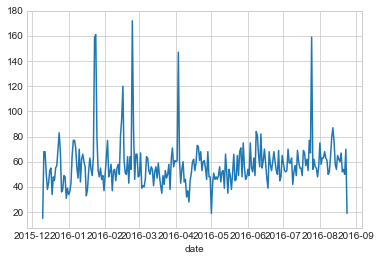

In [105]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()

** Fire calls are more during winters with a spike in the month of july.**

____
** Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [78]:
dayhr = df.groupby(by= ['day','hour']).count()['Reason'].unstack()

In [84]:
dayhr.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


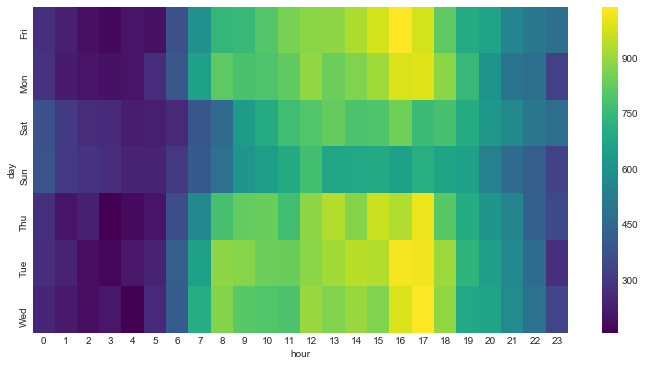

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhr,cmap='viridis')

** This shows that most calls are made between 7am and 7pm. The highest volume of calls are made around 4 or 5pm on nearly every day of the week. It is notable that the weekend has the lowest volumn of calls in general.**

** Creating a clustermap using this DataFrame. **

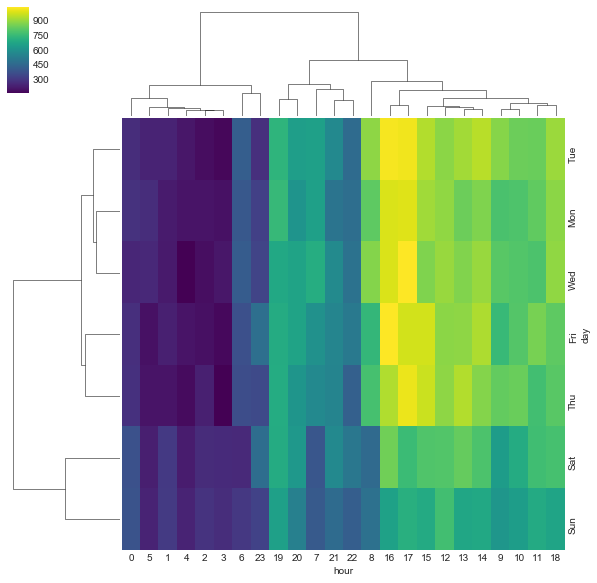

In [107]:
sns.clustermap(dayhr,cmap='viridis')

** This cluster map suggests same thing from the last graph. The weekend days are grouped together showing they have the lowest volume and the normal sleeping hours are to the left of the x-axis showing 911 calls were less likely to be made then.**

** Repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [90]:
monthhr=df.groupby(by= ['month','hour']).count()['Reason'].unstack()

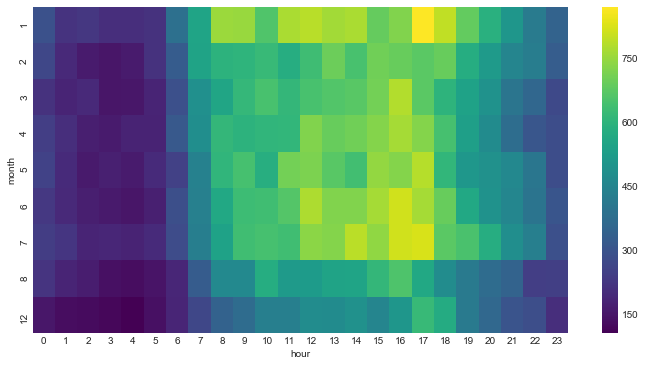

In [108]:
plt.figure(figsize=(12,6))
sns.heatmap(monthhr,cmap='viridis')

** This shows that there were more calls in the same time we found earlier and its showing a downward trend with spike in and around month of july **

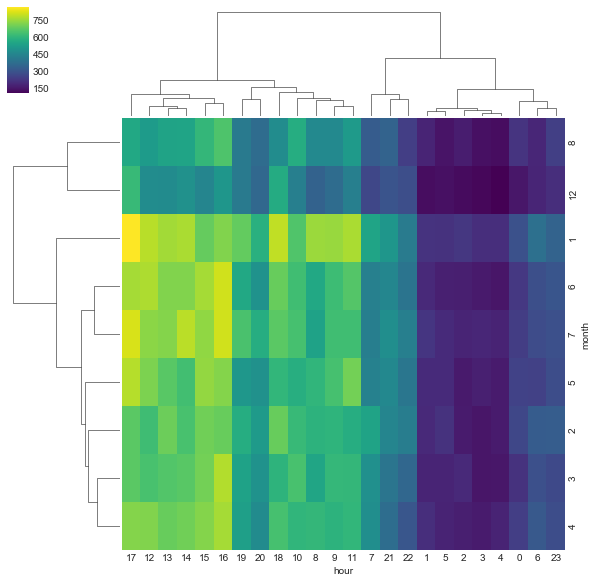

In [109]:
sns.clustermap(monthhr,cmap='viridis')

** The hours when people sleep are grouped together as the calls are very low during that duration and we can see a slight downward trend with months
**